In [1]:
%config Completer.use_jedi = False # in case your autocomplete does not work

Don't be too hasty, let's extend our single layer perceptron into a feedforward neural network with a hidden layer. 

P.S. In case you are not aware of this website, i.e., https://playground.tensorflow.org/, please play around with it. Observe how multiple linear approximator (e.g., single layer perceptron) can generate a non-linear approximator.

# Dataset

Let's generate a toy dataset having a non-linear boundary, e.g., a circle.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [3]:
data, which_group_label = datasets.make_circles(
    n_samples=1000,
    noise=.1,
    factor=.2
)

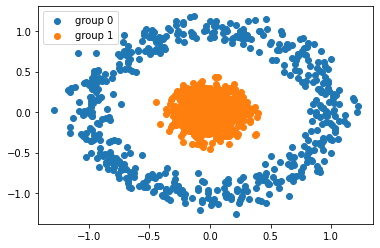

In [4]:
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group 0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group 1')
plt.legend()

# Feedforward NN Model

For a feedforward neural network with a hidden layer, we can concatenate multiple single layer perceptrons.

In [5]:
import torch
import torch.nn as nn

In [6]:
class FNN(nn.Module):
    def __init__(self, input_size, num_neurons_of_hidden_layer, output_size):
        super().__init__()
        self.linear1 = nn.Linear(in_features=input_size,out_features=num_neurons_of_hidden_layer)# input layer
        self.linear2 = nn.Linear(in_features=num_neurons_of_hidden_layer,out_features=output_size)
        
    def forward(self,x):
        # this is where you can concatenate two models
        tmp = torch.sigmoid(self.linear1(x))
        prediction = torch.sigmoid(self.linear2(tmp)) # see how intuitive it is with pytorch :p         
        return prediction
    

# Visualization

While we can visualize the decision boundary, why not? The idea is to use contour to draw the boundary.

In [7]:
x_min, x_max = [min(data[:,0]),max(data[:,0])]
y_min, y_max = [min(data[:,1]),max(data[:,1])]

XX, YY = np.meshgrid(
    np.linspace(x_min,x_max,100),
    np.linspace(y_min,y_max,100)
)

# let's flatten XX and YY
XX_flat = XX.ravel()
YY_flat = YY.ravel()

# let's concatenate them and arrange it so that we can feed them to the model
tmp = np.concatenate((XX_flat,YY_flat))
input_data_tensor = torch.tensor(tmp,dtype=torch.float).view(2,-1).T


In [8]:
model = FNN(2,3,1) # 2 inputs, 3-neuron hidden layer, 1 output

list(model.parameters())

[Parameter containing:
 tensor([[-0.2408, -0.6790],
         [ 0.0764, -0.2136],
         [ 0.6016,  0.3592]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3008, -0.5334, -0.3750], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4204, -0.4923, -0.3602]], requires_grad=True),
 Parameter containing:
 tensor([-0.1954], requires_grad=True)]

In [9]:
z = model.forward(input_data_tensor)

# reshape it accordingly 
z = z.view(XX.shape).detach().numpy()

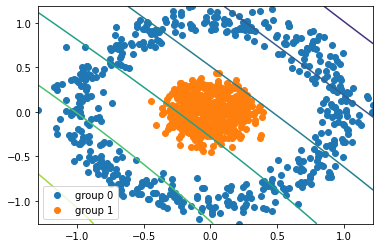

In [10]:
plt.contour(XX,YY,z)
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group 0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group 1')
plt.legend()

which is at the moment meaningless :D

# Training

In [11]:
num_epochs = 1000
loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=1e-2)

In [12]:
losses = []

data_tensor = torch.tensor(data,dtype=torch.float)
label_tensor = torch. tensor(which_group_label, dtype=torch.float).view(-1,1)

for i in range(num_epochs):
    prediction = model.forward(data_tensor)
    loss = loss_fun(prediction, label_tensor)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

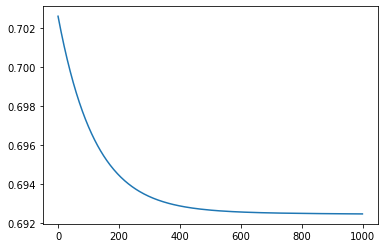

In [13]:
plt.plot(np.arange(num_epochs),losses)

It converges, but it converges to a pretty high number.

# Validate

Let's validate it by drawing the decision boundary. 

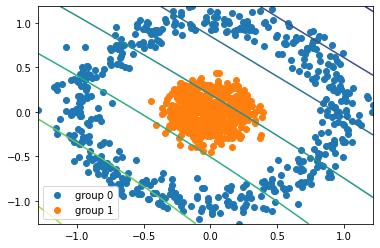

In [14]:
z = model.forward(input_data_tensor)

# reshape it accordingly 
z = z.view(XX.shape).detach().numpy()

plt.contour(XX,YY,z)
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group 0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group 1')
plt.legend()

The decision boundary does not make any sense. How would we fix it in this case? Change the optimizer so that it converges to the lower value.

# Training with Adam optimizer

Many believes that Adam optimizer is the de-facto for deep neural networks. Let's repeat the training (by copying and pasting :D). Fingers Crossed!

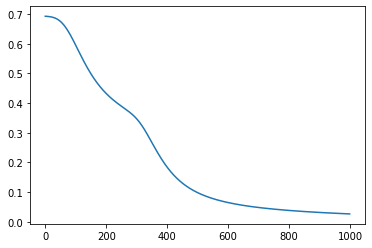

In [15]:
num_epochs = 1000
loss_fun = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=1e-2)

losses = []

data_tensor = torch.tensor(data,dtype=torch.float)
label_tensor = torch. tensor(which_group_label, dtype=torch.float).view(-1,1)

for i in range(num_epochs):
    prediction = model.forward(data_tensor)
    loss = loss_fun(prediction, label_tensor)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(np.arange(num_epochs),losses)

Wow! we obtain a lower value. Let's see the boundary region.

P.S. One of the advantages of ADAM optimizer is that the learning rate is also adaptive. That's why you see a wiggly error curve.

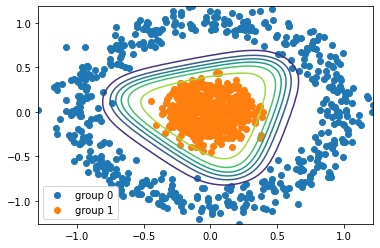

In [16]:
z = model.forward(input_data_tensor)

# reshape it accordingly 
z = z.view(XX.shape).detach().numpy()

plt.contour(XX,YY,z)
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group 0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group 1')
plt.legend()

Much better!! Now, you can play around with RelU instead of the sigmoid activation function.